### Plotting azimuthal angle profiles for improved Cave method

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import cv2
from tqdm import tqdm
import pandas as pd
from common.xray import *
from scipy import interpolate
import openpyxl
pd.options.display.precision = 2
%matplotlib inline

In [2]:
profile_path='./results/profile_cave'
azimuth_eq_names=sorted([filename for filename in os.listdir(profile_path) if filename.endswith('eq_azimuth.pkl')])
current_path=os.getcwd()
t_dir=os.path.join(current_path, 'results/figure/cave')

### visualization of (200) profiles

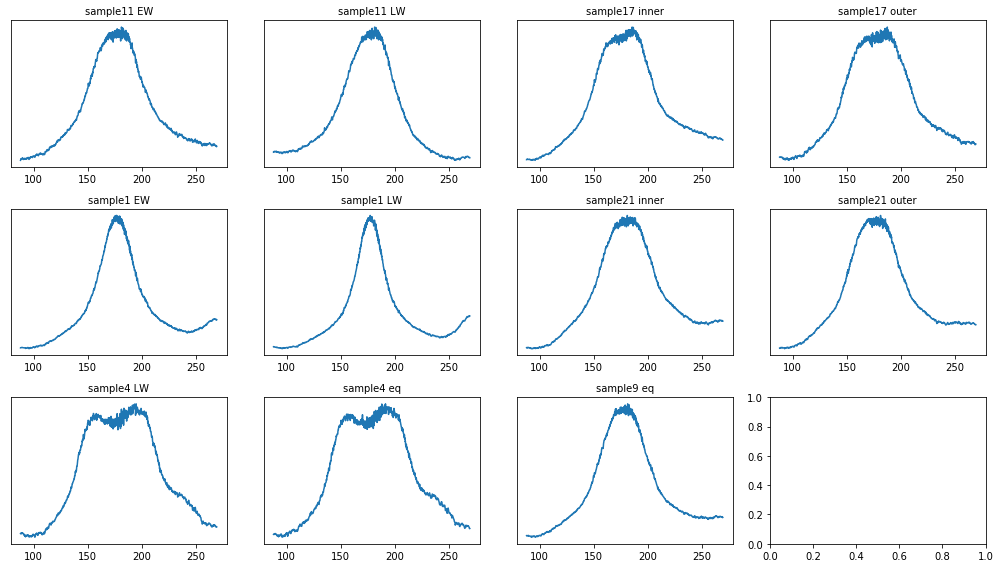

In [7]:
sp_num=len(azimuth_eq_names)
n_cols=4
n_rows=round(sp_num/n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))

azimuth_eq=[]
for i, fl_name in enumerate(azimuth_eq_names):
    df_from_pkl = pd.read_pickle(os.path.join(profile_path,fl_name)) # from profile
    x=df_from_pkl.iloc[:, 0].values
    y=df_from_pkl.iloc[:, 1].values
    
    q,mod=divmod(i,n_cols)
    
    axes[q,mod].plot(x,y)
    axes[q,mod].set_title(fl_name.split('_')[0]+' '+fl_name.split('_')[1], fontsize=10)
    axes[q,mod].set(yticklabels=[])  # remove the tick labels
    axes[q,mod].tick_params(left=False) 
    
fig.tight_layout()
plt.show()    

### Background subtraction
In this time, linear background is considered.<br>
Intensity minima are obtained at the left (-180) and right side (180-) of profile.<br>
Baseline is considered as the line connecting intensity minima.<br>

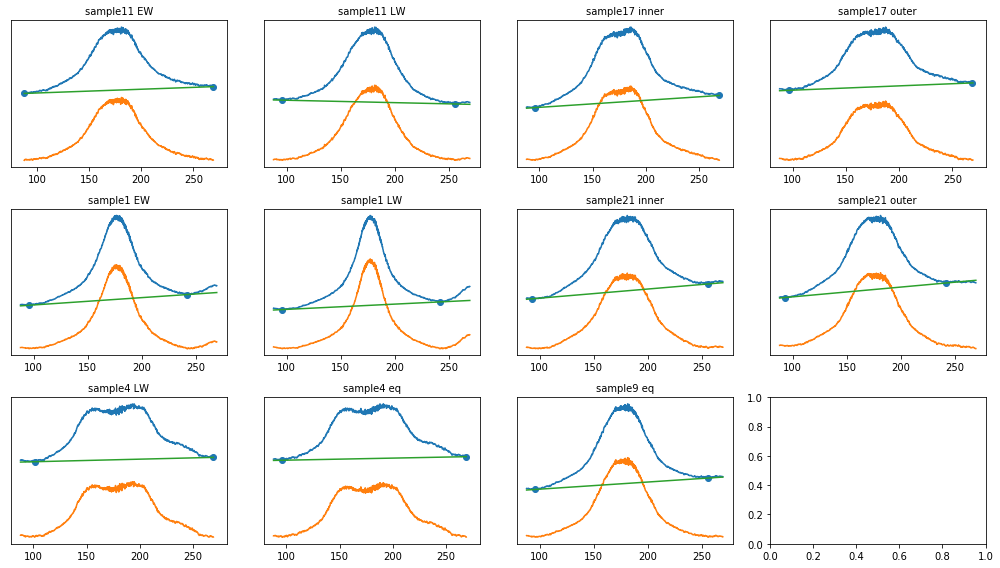

In [8]:
sp_num=len(azimuth_eq_names)
n_cols=4
n_rows=round(sp_num/n_cols)
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(14, 8))

azimuth_eq=[]
for i, fl_name in enumerate(azimuth_eq_names):
    df_from_pkl = pd.read_pickle(os.path.join(profile_path,fl_name)) # from profile
    x=df_from_pkl.iloc[:, 0].values
    y=df_from_pkl.iloc[:, 1].values
    
    center_ind=np.argmin(np.abs(x-180))
    left_min_ind=np.argmin(y[:center_ind])
    right_min_ind=np.argmin(y[center_ind:])+center_ind
    
    #background function
    target_ind=[left_min_ind, right_min_ind]
    f=interpolate.interp1d(x[target_ind], y[target_ind], kind="linear", fill_value='extrapolate')
    bg=f(x)
    
    #visualization
    q,mod=divmod(i,n_cols)
    
    axes[q,mod].plot(x,y)
    axes[q,mod].plot(x,y-bg)
    axes[q,mod].plot(x,bg)
    axes[q,mod].scatter(x[target_ind], y[target_ind])
    axes[q,mod].set_title(fl_name.split('_')[0]+' '+fl_name.split('_')[1], fontsize=10)
    axes[q,mod].set(yticklabels=[])  # remove the tick labels
    axes[q,mod].tick_params(left=False) 
    
fig.tight_layout()
plt.show()    

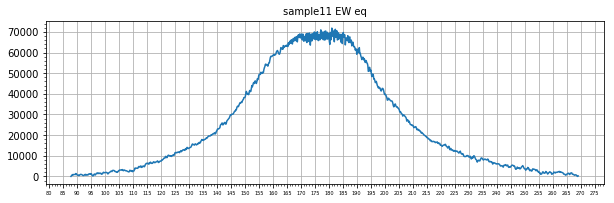

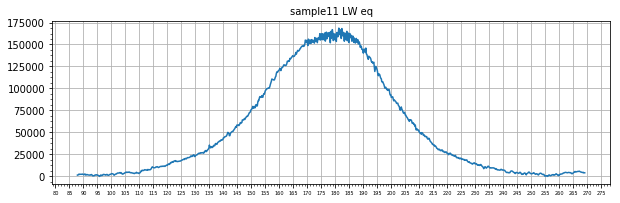

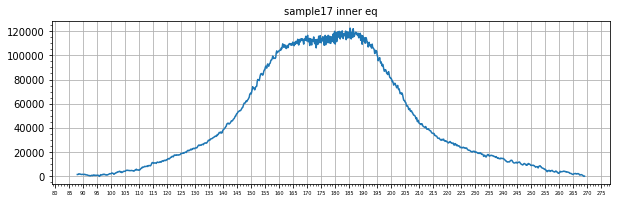

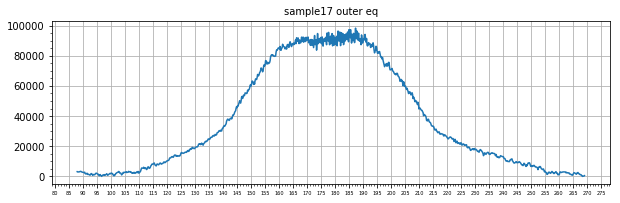

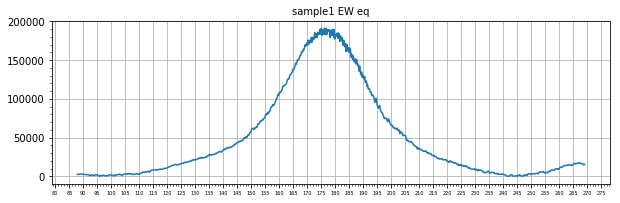

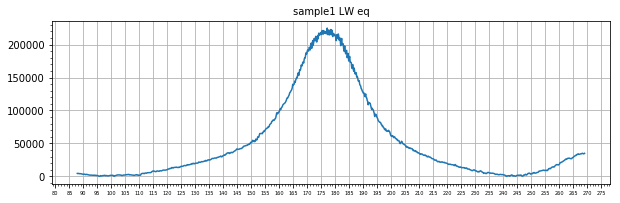

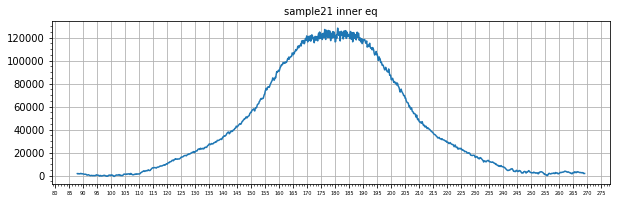

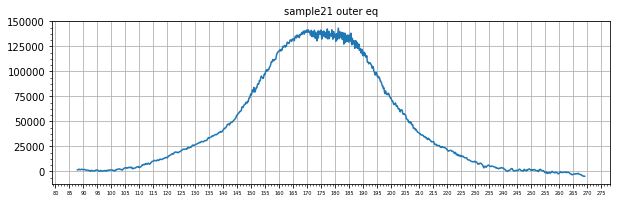

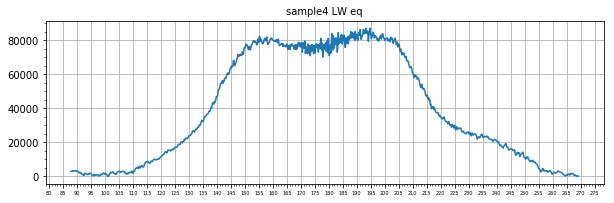

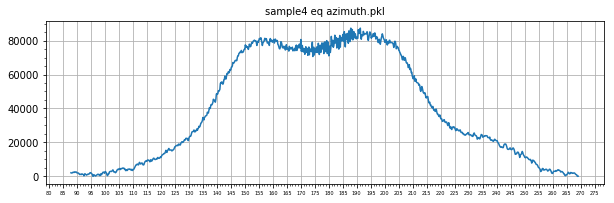

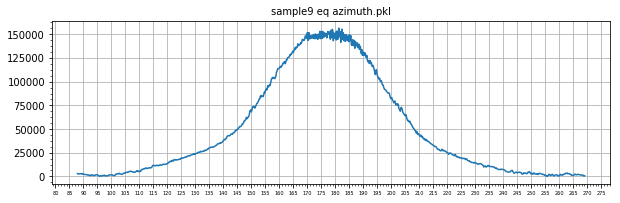

In [9]:
for i, fl_name in enumerate(azimuth_eq_names):
    df_from_pkl = pd.read_pickle(os.path.join(profile_path,fl_name)) # from profile
    x=df_from_pkl.iloc[:, 0].values
    y=df_from_pkl.iloc[:, 1].values
    
    center_ind=np.argmin(np.abs(x-180))
    left_min_ind=np.argmin(y[:center_ind])
    right_min_ind=np.argmin(y[center_ind:])+center_ind
    
    #background function
    target_ind=[left_min_ind, right_min_ind]
    f=interpolate.interp1d(x[target_ind], y[target_ind], kind="linear", fill_value='extrapolate')
    bg=f(x)
    
    #set save name
    fl_name_list=fl_name.split("_")
    
    #visualization
    plt.figure(figsize=(10, 3))
    plt.plot(x,y-bg)
    plt.title(fl_name.split('_')[0]+' '+fl_name.split('_')[1]+' '+fl_name_list[2], fontsize=10)
    plt.xticks(np.arange(80, 280, step=5), fontsize=5)
    plt.minorticks_on()
    plt.grid()
    fig.tight_layout()
    plt.savefig(os.path.join(t_dir, fl_name_list[0]+"_"+fl_name_list[1]+"_"+fl_name_list[2]+".png"), dpi=1200)
    plt.show() 
    plt.close()